In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['entity', 'sentiment', 'tweet_id', 'content']

In [3]:
df.head()

,entity,sentiment,tweet_id,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.shape

(74682, 4)

In [5]:
df.describe

<bound method NDFrame.describe of        entity    sentiment  tweet_id  \
0        2401  Borderlands  Positive   
1        2401  Borderlands  Positive   
2        2401  Borderlands  Positive   
3        2401  Borderlands  Positive   
4        2401  Borderlands  Positive   
...       ...          ...       ...   
74677    9200       Nvidia  Positive   
74678    9200       Nvidia  Positive   
74679    9200       Nvidia  Positive   
74680    9200       Nvidia  Positive   
74681    9200       Nvidia  Positive   

                                                 content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just r

In [6]:
df.isnull().sum()

entity         0
sentiment      0
tweet_id       0
content      686
dtype: int64

In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
df.isnull().sum()

entity       0
sentiment    0
tweet_id     0
content      0
dtype: int64

In [9]:
df.duplicated().sum()

2340

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.shape

(71656, 4)

C:\Users\muskan chaudhary\AppData\Local\Temp\ipykernel_18064\752048381.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


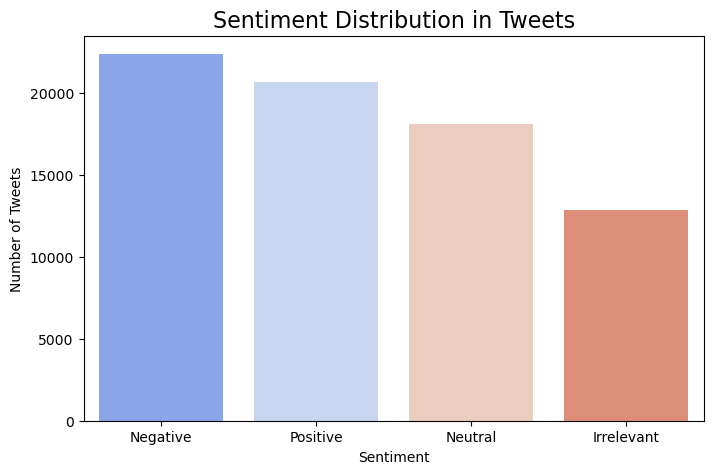

In [24]:
# Count sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution in Tweets", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


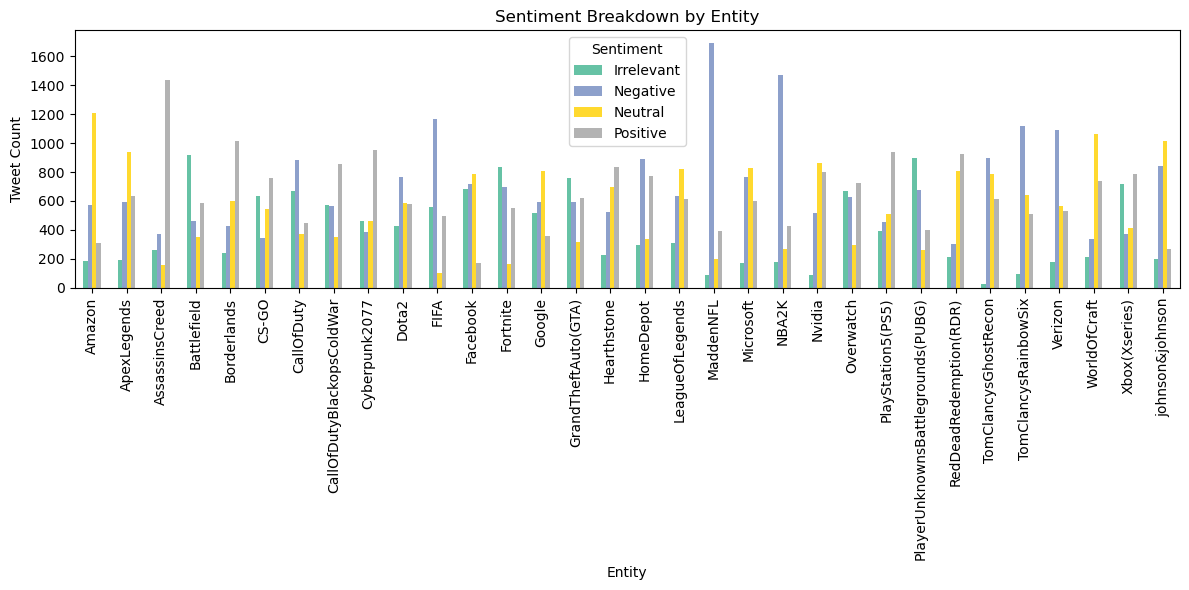

In [25]:
# Group by Entity and Sentiment
entity_sentiment = df.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)

# Plot grouped bar chart
entity_sentiment.plot(kind='bar', stacked=False, figsize=(12, 6), colormap="Set2")
plt.title("Sentiment Breakdown by Entity")
plt.xlabel("Entity")
plt.ylabel("Tweet Count")
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [26]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


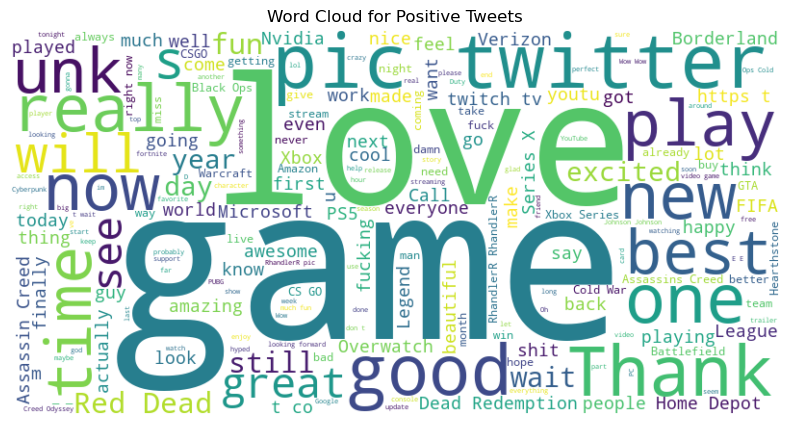

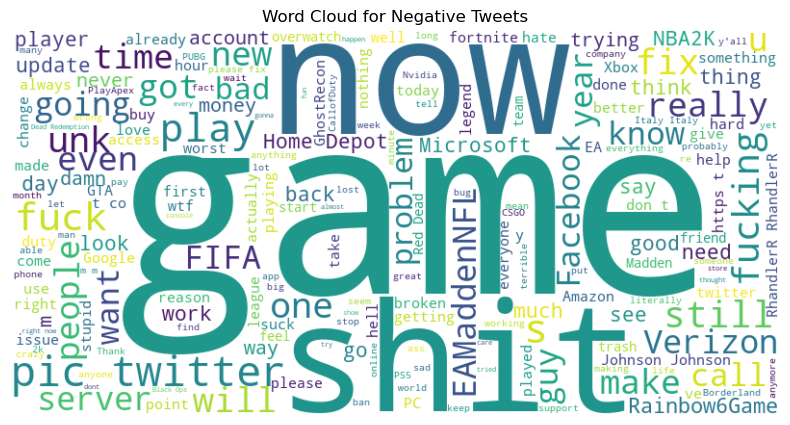

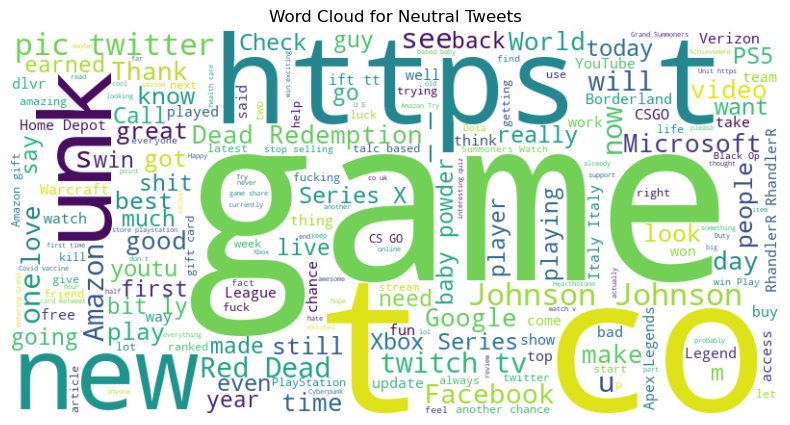

In [27]:
from wordcloud import WordCloud

# Function to plot word cloud
def plot_wordcloud(data, sentiment):
    text = " ".join(tweet for tweet in data[data['Sentiment'] == sentiment]['Tweet_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()

# Plot for each sentiment
plot_wordcloud(df, 'Positive')
plot_wordcloud(df, 'Negative')
plot_wordcloud(df, 'Neutral')


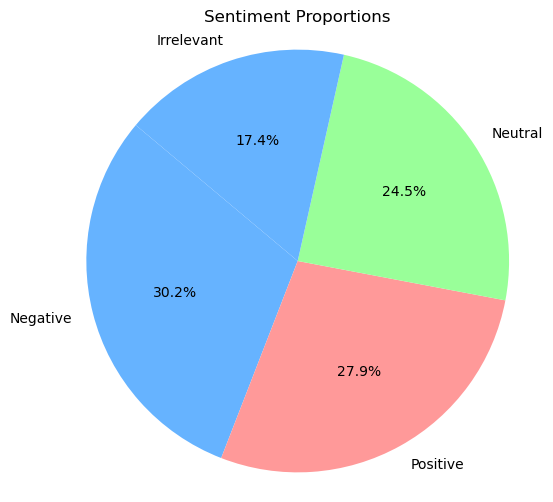

In [30]:
# Pie chart of sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
colors = ['#66b3ff', '#ff9999', '#99ff99']

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


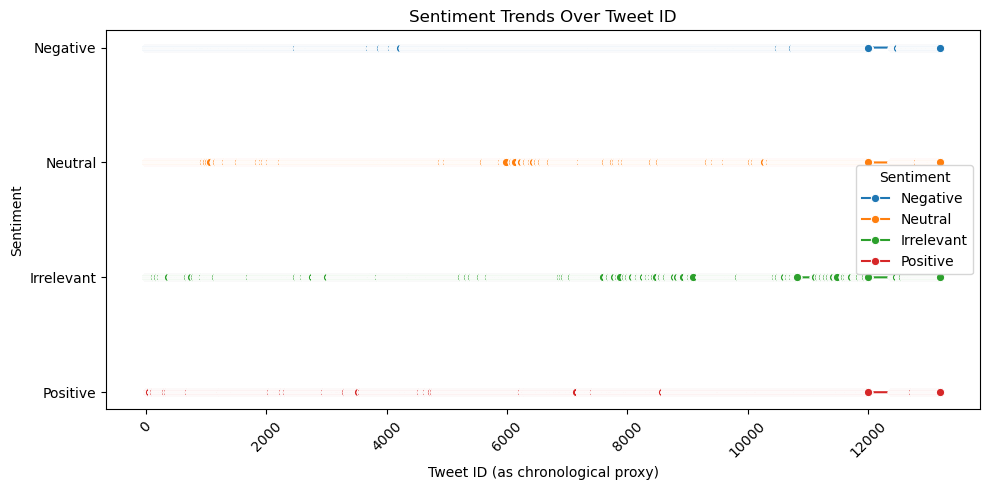

In [32]:
# Basic line plot of sentiment over tweet ID
df['Tweet_ID'] = pd.to_numeric(df['Tweet_ID'], errors='coerce')
df_sorted = df.sort_values(by='Tweet_ID')

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sorted, x='Tweet_ID', y='Sentiment', marker='o', hue='Sentiment', estimator=None)
plt.title("Sentiment Trends Over Tweet ID")
plt.ylabel("Sentiment")
plt.xlabel("Tweet ID (as chronological proxy)")
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
